<br>

# Ripple-associated amplitude changes

The forth notebook is used to analyse putative ripple-associated CG amplitude changes (that is, during hippocampal ripple occurrence) in different task contexts. It does so by:

- Plotting the averaged amplitude (uV) before and after ripple occurrence during different task phases or contexts;
- Plotting amplitude for all SWR events in a heatmap;
- Significance testing of observed changes to baseline. Test used:

<br>

### Imports

In [2]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<br>

### Open datasets

In [4]:
main_path = 'PreProcessedData'
cg_data = pd.read_csv(os.path.join(main_path, 'cg_data.csv'), index_col=False)
ripple_data = pd.read_csv(os.path.join(main_path, 'cg_analysis_ripple_library.csv'), index_col=False)

<br>

### Inspect dataset

In [5]:
cg_data.head()

,ripple_nr,timestamp,TT1,TT2,TT3,TT4,TT5,TT6,TT7,TT8,TT9,TT10,TT11,TT12,TT13,TT14,start_time,phase,relative_timestamp
0,0,83.25725,151.905,105.105,158.730,191.685,-38.610,121.485,115.245,146.835,149.760,147.225,8.970,73.905,37.830,70.590,83.75725,Sample,-0.5000
1,0,83.25775,144.495,125.190,151.515,148.980,-86.775,116.415,108.420,145.470,145.080,130.455,7.020,70.785,44.070,67.275,83.75725,Sample,-0.4995
2,0,83.25825,76.440,95.940,108.420,106.470,-139.620,68.250,33.150,111.735,109.590,75.855,-79.755,15.405,12.870,23.010,83.75725,Sample,-0.4990
3,0,83.25875,0.000,17.160,54.990,18.525,-220.155,-26.715,-52.455,40.365,65.520,-0.780,-129.870,-38.610,-71.955,-40.365,83.75725,Sample,-0.4985
4,0,83.25925,-20.280,-10.920,28.665,15.795,-262.470,-54.015,-74.685,16.380,18.915,-39.585,-130.650,-69.615,-82.485,-88.140,83.75725,Sample,-0.4980


In [6]:
cg_data.ripple_nr.nunique()

628

<br>

### Perform transformations on dataset 

##### Tranform to long format

In [72]:
tt_columns=['TT{}'.format(x) for x in range(1,14)]

In [73]:
data = cg_data.melt(
    id_vars=['ripple_nr', 'timestamp', 'relative_timestamp', 'start_time', 'phase'],
    value_vars=tt_columns,
    var_name = 'TT',
    value_name='voltage'
)

In [74]:
data[data.ripple_nr == 0]['phase'].unique()

array(['Sample'], dtype=object)

#### Define relative time bins with bin centers to plot

In [75]:
# defining the bin edges (can't use range with floats)
bins=[float(x/100) for x in [*range(-50, 50, 1)]]
# bin the relative timestamp column (10 ms bins)
data['bins'] = pd.cut(data['relative_timestamp'], bins)
data["bin_centres"] = data["bins"].apply(lambda x: x.mid)

# Drop edge datapoints with no bin
data = data.dropna()

In [76]:
data.head()

,ripple_nr,timestamp,relative_timestamp,start_time,phase,TT,voltage,bins,bin_centres
1,0,83.25775,-0.4995,83.75725,Sample,TT1,144.495,"(-0.5, -0.49]",-0.495
2,0,83.25825,-0.4990,83.75725,Sample,TT1,76.440,"(-0.5, -0.49]",-0.495
3,0,83.25875,-0.4985,83.75725,Sample,TT1,0.000,"(-0.5, -0.49]",-0.495
4,0,83.25925,-0.4980,83.75725,Sample,TT1,-20.280,"(-0.5, -0.49]",-0.495
5,0,83.25975,-0.4975,83.75725,Sample,TT1,8.385,"(-0.5, -0.49]",-0.495


<br>

#### Combine pre-choice and post-choice test phase

In [77]:
data.loc[(data['phase']=='Test (Pre-choice)')|(data['phase']=='Test (Past-choice)'), 'phase']='Test'

<br>

### Plot averaged amplitude changes

In [30]:
colors = sns.color_palette('Spectral', 12)
phase_palette = [colors[0], colors[2], colors[4], colors[10]]

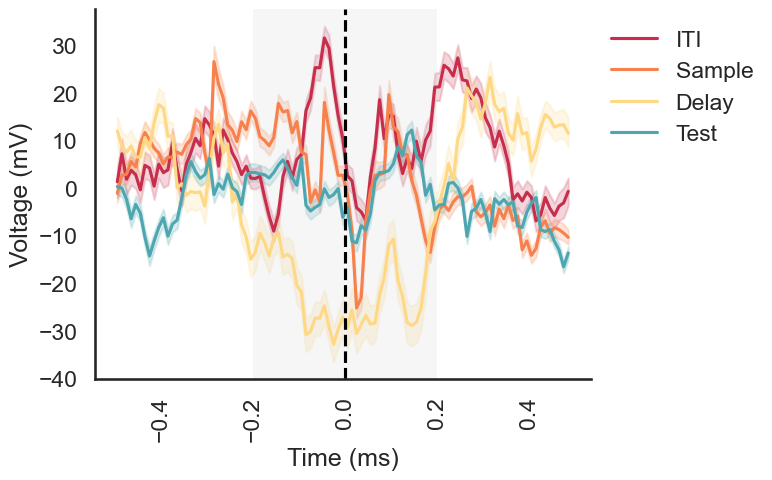

In [40]:
sns.set(context='talk', style='white')
plt.Figure(dpi=300, figsize=(16,4))

g = sns.lineplot(
    data = data,
    x ='bin_centres', 
    y ='voltage',
    hue='phase',
    errorbar = 'ci',
    n_boot=1000,
    estimator ='mean',
    palette = phase_palette,
    hue_order = ['ITI', 'Sample', 'Delay', 'Test']
)

# Improve labels
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xticks(rotation=90)
plt.legend(frameon=False, bbox_to_anchor=(1,1))


# Add vertical bar to SWR onset (relative_timestamp = 0)
plt.axvline(x=0, color='black', linestyle='--')  #Need to fix

# Add shadowed areas
plt.axvspan(xmin= -0.2, xmax= -0.001, color='lightgray', alpha=0.2, linewidth=0)
plt.axvspan(xmin=0.001, xmax=0.2, color='lightgray', alpha=0.2, linewidth=0)

sns.despine()

<br> 

### Test changes to baseline

- Comparing pre-ripple (baseline) and post-ripple amplitude changes 
- Repeated measures ANOVA (1 factor = SWR location, across time: before vs. after)

In [41]:
# Before distribution (average) vs. after distribution (average)

In [ ]:
# Check normality of such distributions

In [ ]:
# Add statistical method and comparison

<br>

## Heatmap amplitude changes 

<br>

#### Pivot dataset for plot

In [114]:
data[data.ripple_nr==29]

,ripple_nr,timestamp,relative_timestamp,start_time,phase,TT,voltage,bins,bin_centres
58030,29,1079.21975,-0.4995,1079.71925,ITI,TT1,19.500,"(-0.5, -0.49]",-0.495
58031,29,1079.22025,-0.4990,1079.71925,ITI,TT1,5.265,"(-0.5, -0.49]",-0.495
58032,29,1079.22075,-0.4985,1079.71925,ITI,TT1,16.380,"(-0.5, -0.49]",-0.495
58033,29,1079.22125,-0.4980,1079.71925,ITI,TT1,2.925,"(-0.5, -0.49]",-0.495
58034,29,1079.22175,-0.4975,1079.71925,ITI,TT1,-9.750,"(-0.5, -0.49]",-0.495
...,...,...,...,...,...,...,...,...,...
21609590,29,1079.88175,0.1625,1079.71925,ITI,TT13,-178.620,"(0.16, 0.17]",0.165
21609591,29,1079.88225,0.1630,1079.71925,ITI,TT13,-54.015,"(0.16, 0.17]",0.165
21609592,29,1079.88275,0.1635,1079.71925,ITI,TT13,13.845,"(0.16, 0.17]",0.165
21609593,29,1079.88325,0.1640,1079.71925,ITI,TT13,-125.580,"(0.16, 0.17]",0.165


In [99]:
heatmap_data = data.groupby(['phase', 'ripple_nr', 'bin_centres'])['voltage'].mean().reset_index()

In [100]:
# Step above creates all possible combinations of phase x ripple nr and adds NA if doesn't exist
heatmap_data = heatmap_data.dropna()

In [121]:
iti_data= heatmap_data[heatmap_data.phase=='ITI'].drop(
    'phase', axis=1).pivot(index='ripple_nr', columns= 'bin_centres', values='voltage')

sample_data= heatmap_data[heatmap_data.phase=='Sample'].drop(
    'phase', axis=1).pivot(index='ripple_nr', columns= 'bin_centres', values='voltage')

delay_data= heatmap_data[heatmap_data.phase=='Delay'].drop(
    'phase', axis=1).pivot(index='ripple_nr', columns= 'bin_centres', values='voltage')

test_data= heatmap_data[heatmap_data.phase=='Test'].drop(
    'phase', axis=1).pivot(index='ripple_nr', columns= 'bin_centres', values='voltage')

Text(0.5, 1.0, 'Test')

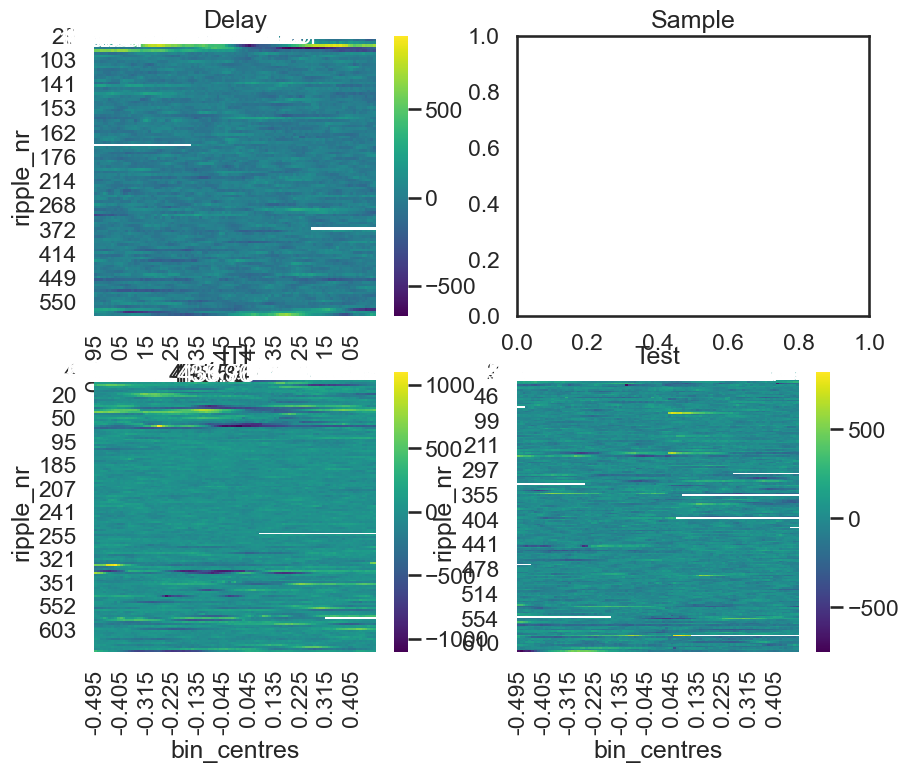

In [122]:
# Creating a 2x2 grid of subplots

## Sample scale
## Drop or fix ripples lacking data

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(
    iti_data,
    ax=axes[0, 0], 
    cmap='viridis', 
    annot=True, fmt=".2f", 
    cbar=True)

sns.heatmap(
    delay_data,
    ax=axes[1, 0], 
    cmap='viridis', 
    annot=True, fmt=".2f", 
    cbar=True)


sns.heatmap(
    test_data,
    ax=axes[1, 1], 
    cmap='viridis', 
    annot=True, fmt=".2f", 
    cbar=True)



axes[0, 0].set_title('ITI')
axes[0, 1].set_title('Sample')
axes[1, 0].set_title('Delay')
axes[1, 1].set_title('Test')

TypeError: heatmap() missing 1 required positional argument: 'data'

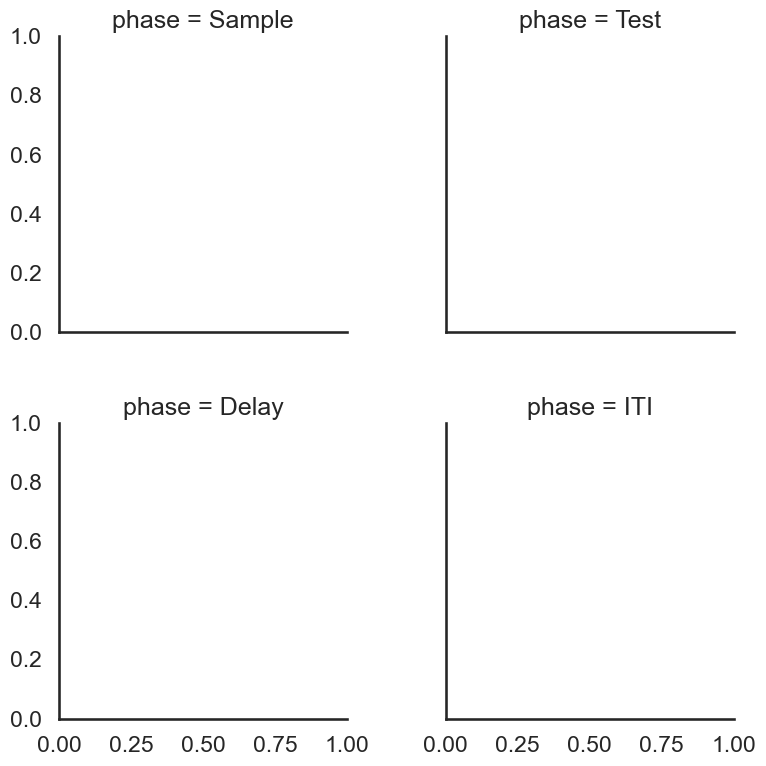

In [42]:
#xAxis = time
#y Axis = voltage

g.map(sns.heatmap, cmap='viridis', annot=True, fmt=".2f", cbar=True)
